In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
print("/nMissing values in each column:")
df.isnull().sum()

/nMissing values in each column:


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
print("\nCount of unique values in 'TV' column:")
print(df['TV'].value_counts())


Count of unique values in 'TV' column:
TV
17.2     2
199.8    2
240.1    2
237.4    2
177.0    2
        ..
149.7    1
38.2     1
94.2     1
283.6    1
232.1    1
Name: count, Length: 190, dtype: int64


In [6]:
print("\nCount of unique values in 'Radio' column:")
print(df['Radio'].value_counts())


Count of unique values in 'Radio' column:
Radio
4.1     3
5.7     3
48.9    2
2.6     2
27.7    2
       ..
28.7    1
41.1    1
35.6    1
3.7     1
8.6     1
Name: count, Length: 167, dtype: int64


In [7]:
print("\nCount of unique values in 'Newspaper' column:")
print(df['Newspaper'].value_counts())


Count of unique values in 'Newspaper' column:
Newspaper
25.6    3
8.7     3
9.3     3
45.1    2
30.0    2
       ..
3.7     1
5.8     1
13.8    1
8.1     1
66.2    1
Name: count, Length: 172, dtype: int64


In [8]:
print("\nCount of unique values in 'Sales' column:")
print(df['Sales'].value_counts())


Count of unique values in 'Sales' column:
Sales
11.9    5
16.7    5
20.7    4
13.2    3
9.7     3
       ..
26.2    1
6.7     1
5.9     1
14.8    1
25.5    1
Name: count, Length: 121, dtype: int64


In [9]:
print("\nDuplicate rows in the Dataframe:")
print(df.duplicated().sum())


Duplicate rows in the Dataframe:
0


In [10]:
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.describe(include="all")

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


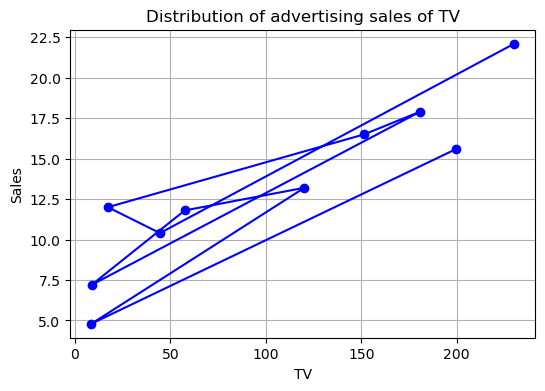

In [14]:
plt.figure(figsize=(6,4))
plt.plot(df["TV"].head(10),df["Sales"].head(10),marker='o',linestyle='-',color='b')#Line plot of sales over months
plt.title("Distribution of advertising sales of TV")#Line plot showing Sales trends over the year
plt.xlabel("TV")#Label for the x-axis
plt.ylabel("Sales")#Label for the y-axis
plt.grid(True)#Show grid lines for better readability
plt.show()#Display the plot

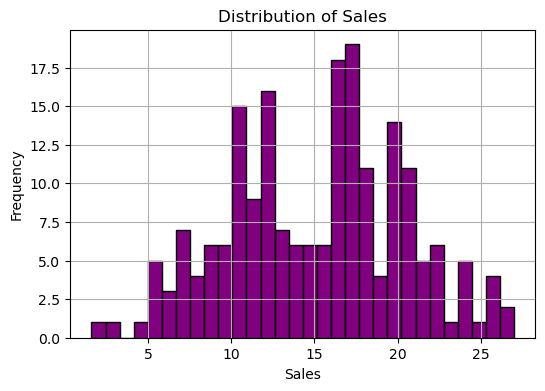

In [15]:
data=df["Sales"]
plt.figure(figsize=(6, 4))
plt.hist(data, bins=30, color='purple', edgecolor='black')#Histogram showing the distribution of data
plt.title('Distribution of Sales')#Histogram of data distribution
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

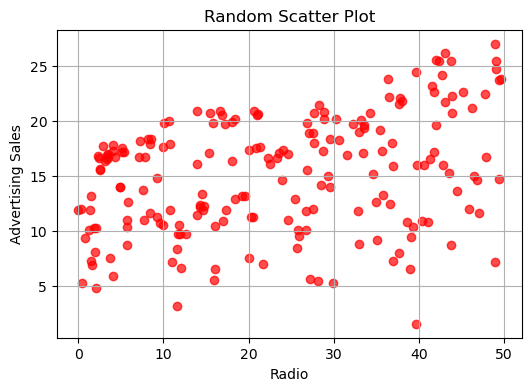

In [16]:
np.random.seed(1)#For reproducibility
x=df["Radio"]
y=df["Sales"]
plt.figure(figsize=(6,4))
plt.scatter(x,y,color='red',alpha=0.7)#Scatter plot showing relationship between x and y
plt.title("Random Scatter Plot")
plt.xlabel("Radio")
plt.ylabel("Advertising Sales")
plt.grid(True)
plt.show()

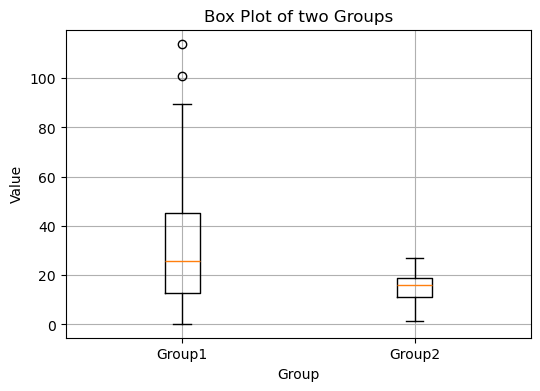

In [17]:
np.random.seed(2)#For reproducibility
Group1=df["Newspaper"]
Group2=df["Sales"]
plt.figure(figsize=(6,4))
plt.boxplot([Group1,Group2],labels=['Group1','Group2'])#Box plot showing distribution of data and labels
plt.title("Box Plot of two Groups")
plt.xlabel('Group')
plt.ylabel('Value')
plt.grid(True)
plt.show()

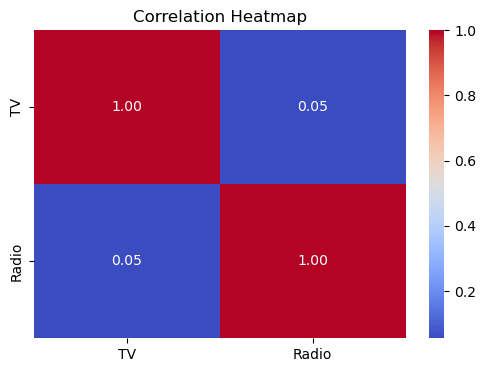

In [18]:
plt.figure(figsize=(6,4))
corr_matrix=df[["TV","Radio"]].corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")#Heatmap of Correlation Matrix with annotations
plt.show()

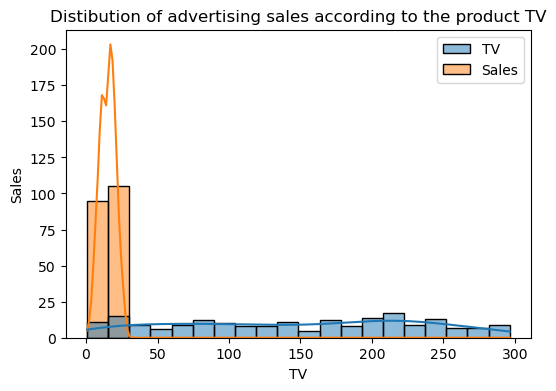

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df[['TV','Sales']],bins=20,kde=True, color='purple')#Histogram with KDE overlay
plt.title('Distibution of advertising sales according to the product TV')#Histogram with KDE showing Recived Amount distribution
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

<Figure size 600x400 with 0 Axes>

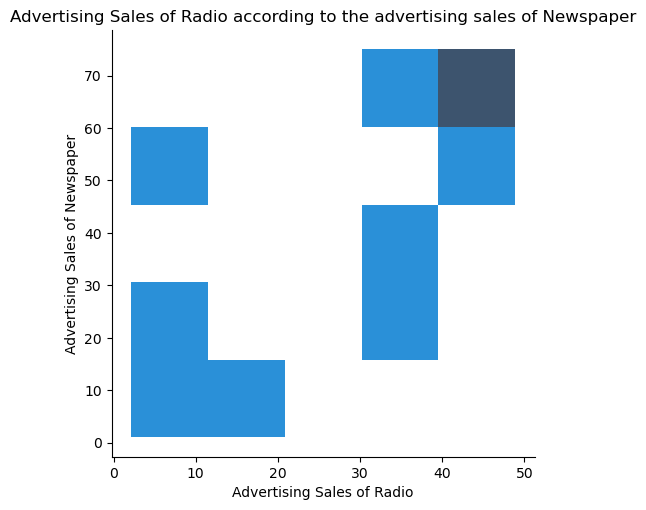

In [20]:
plt.figure(figsize=(6,4))
sns.displot(x=df['Radio'].head(10),y=df['Newspaper'].head(100),data=df, palette='pastel')
plt.title("Advertising Sales of Radio according to the advertising sales of Newspaper")
plt.xlabel("Advertising Sales of Radio")
plt.ylabel("Advertising Sales of Newspaper")
plt.show()

In [21]:
sns.set(style="whitegrid")

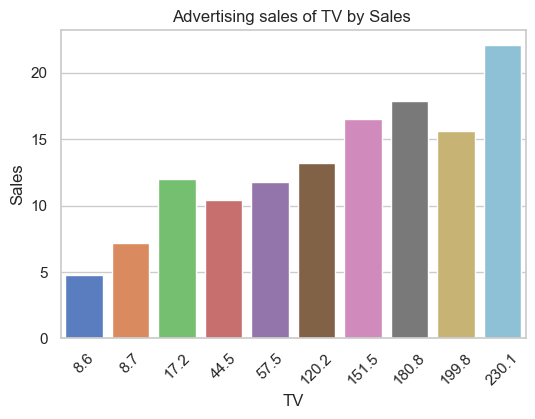

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.barplot(x=df['TV'].head(10),y=df['Sales'].head(10),data=df,estimator='mean',palette='muted')
plt.title("Advertising sales of TV by Sales ")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

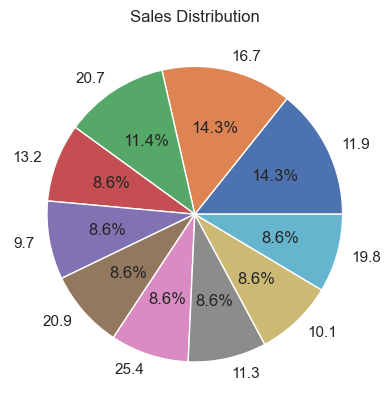

In [23]:
Sales_counts = df['Sales'].value_counts().head(10)
plt.pie(Sales_counts, labels=Sales_counts.index, autopct='%1.1f%%')
plt.title('Sales Distribution')
plt.show()

In [24]:
X=df[["TV"]]#Predictor variable
y=df["Sales"]#Target variable

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
simple_model=LinearRegression()
simple_model.fit(X_train,y_train)

LinearRegression()

Mean Squared Error: 6.101072906773964
R^2 Score: 0.802561303423698


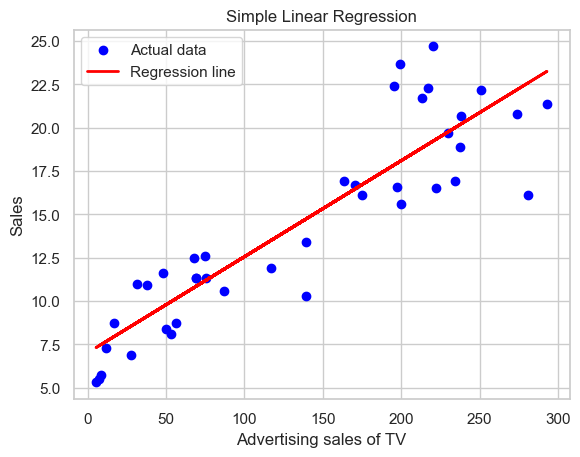

In [27]:
#Predictions
y_pred =simple_model.predict(X_test)
#Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')
print(f'R^2 Score: {r2_score(y_test,y_pred)}')
#Plot the regression line
plt.scatter(X_test,y_test, color='blue',label='Actual data')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Regression line')
plt.xlabel("Advertising sales of TV")
plt.ylabel("Sales")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [28]:
advertising_sales=float(input("Enter the advertising sales of TV:"))
advertising_sales_array=np.array([[advertising_sales]])
predicted_sales=simple_model.predict(advertising_sales_array)
print(f'The predicted sales for advertising sales value of {advertising_sales_array} is: ${predicted_sales[0]:.2f}')

Enter the advertising sales of TV: 19


The predicted sales for advertising sales value of [[19.]] is: $8.06
